<a href="https://colab.research.google.com/github/SteAmarante/python-data-science/blob/main/aula_08/exercicio_fixacao_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Titanic

https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [ ]:
!pip install scikit-learn

In [ ]:
# Importar pacotes essenciais
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.isna().sum().sum()

np.int64(866)

##1 - Carregue o dataset, limpe os dados faltantes e faça a divisão treino/teste.

In [ ]:
df = df[['Survived', 'Age', 'Pclass']].dropna()

In [ ]:
#Separação treino/teste
x = df[['Age', 'Pclass']]
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##2- Crie um modelo (Regressão Logística ou Árvore de Decisão) para prever sobrevivência usando idade (Age) e classe (Pclass).

In [ ]:
# Criar e treinar o modelo Regressão Logística
modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Fazer previsões de sobrevivencia
y_pred_lr = modelo_lr.predict(x_test)

In [ ]:
# Criar e treinar o modelo Arvore de Decisão
modelo_ad = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_ad.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Fazer previsões de sobrevivencia
y_pred_ad = modelo_ad.predict(x_test)

##3- Avalie a acurácia, precision e recall do modelo.

In [ ]:
# Avaliar desempenho LR
print("Acurácia:", accuracy_score(y_test, y_pred_lr))

# Relatório detalhado
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred_lr, target_names=["Não Sobrevivente", "Sobreviveu"]))

Acurácia: 0.6783216783216783

Relatório de Classificação:

                  precision    recall  f1-score   support

Não Sobrevivente       0.70      0.83      0.76        87
      Sobreviveu       0.62      0.45      0.52        56

        accuracy                           0.68       143
       macro avg       0.66      0.64      0.64       143
    weighted avg       0.67      0.68      0.67       143



In [ ]:
# Avaliar desempenho
print("Acurácia:", accuracy_score(y_test, y_pred_ad))

# Relatório detalhado
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred_ad, target_names=["Não Sobrevivente", "Sobreviveu"]))

Acurácia: 0.6923076923076923

Relatório de Classificação:

                  precision    recall  f1-score   support

Não Sobrevivente       0.70      0.86      0.77        87
      Sobreviveu       0.67      0.43      0.52        56

        accuracy                           0.69       143
       macro avg       0.68      0.65      0.65       143
    weighted avg       0.69      0.69      0.67       143



##4- Compare os resultados usando outro algoritmo (Random Forest).

In [ ]:
# Criar e treinar o modelo Randon Forest
modelo_df = RandomForestClassifier(random_state=42)
modelo_df.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Fazer previsões de sobrevivencia
y_pred_df = modelo_df.predict(x_test)

In [ ]:
#Comparação dos resultados Random Forest e AD
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_df))
print("Acurácia Árvore de Decisão:", accuracy_score(y_test, y_pred_ad))

Acurácia Random Forest: 0.6713286713286714
Acurácia Árvore de Decisão: 0.6923076923076923


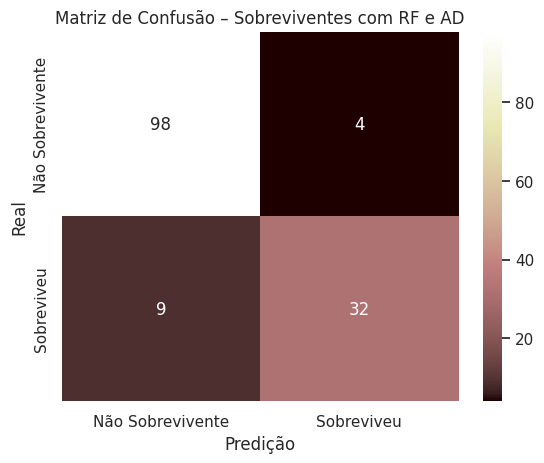

In [ ]:
# Matriz de confusão resultados Random Forest e AD
cm = confusion_matrix(y_pred_df, y_pred_ad)
sns.heatmap(cm, annot=True, fmt="d", cmap="pink",
            xticklabels=["Não Sobrevivente", "Sobreviveu"],
            yticklabels=["Não Sobrevivente", "Sobreviveu"])
plt.xlabel("Predição")
plt.ylabel("Real")
plt.title("Matriz de Confusão – Sobreviventes com RF e AD")
plt.show()

In [ ]:
#Comparação dos resultados Random Forest e LR
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_df))
print("Acurácia Regressão Lógica:", accuracy_score(y_test, y_pred_lr))

Acurácia Random Forest: 0.6713286713286714
Acurácia Regressão Lógica: 0.6783216783216783


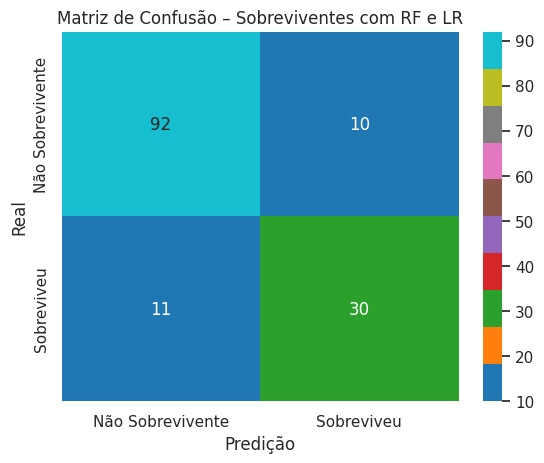

In [ ]:
# Matriz de confusão resultados Random Forest e LR
cm_2 = confusion_matrix(y_pred_df, y_pred_lr)
sns.heatmap(cm_2, annot=True, fmt="d", cmap="tab10",
            xticklabels=["Não Sobrevivente", "Sobreviveu"],
            yticklabels=["Não Sobrevivente", "Sobreviveu"])
plt.xlabel("Predição")
plt.ylabel("Real")
plt.title("Matriz de Confusão – Sobreviventes com RF e LR")
plt.show()

##5 - Analise dos modelos utilizados. (Eficiência)

Com base nas pontuações de acurácia e relatórios de classificação que você já gerou, aqui está uma análise da eficiência de cada modelo:

**Regressão Logística:**

*   **Acurácia:** Aproximadamente 67,8%. Isso significa que o modelo previu corretamente a sobrevivência cerca de 68% das vezes.
*   **Relatório de Classificação:**
    *   **Não Sobreviventes:** O modelo tem boa precisão (70%) e recall (83%) para prever não sobreviventes. Isso significa que, quando prevê que alguém não sobreviveu, está correto 70% das vezes, e identifica corretamente 83% de todos os não sobreviventes reais.
    *   **Sobreviventes:** A precisão (62%) e o recall (45%) são menores para prever sobreviventes. Isso indica que o modelo é menos preciso na identificação de sobreviventes reais.

**Árvore de Decisão:**

*   **Acurácia:** Aproximadamente 69,2%. Este modelo teve um desempenho ligeiramente melhor do que a Regressão Logística em termos de acurácia geral.
*   **Relatório de Classificação:**
    *   **Não Sobreviventes:** Semelhante à Regressão Logística, a Árvore de Decisão tem boa precisão (70%) e recall (86%) para não sobreviventes.
    *   **Sobreviventes:** A precisão (67%) é ligeiramente melhor do que a Regressão Logística para sobreviventes, mas o recall (43%) é ligeiramente menor.

**Random Forest:**

*   **Acurácia:** Aproximadamente 67,1%. Este modelo teve a menor acurácia geral entre os três.

**Comparação:**

*   O modelo **Árvore de Decisão** teve a maior acurácia nesta comparação, embora a diferença seja pequena.
*   Tanto a **Regressão Logística** quanto a **Árvore de Decisão** tiveram um desempenho melhor na previsão de não sobreviventes do que sobreviventes, como indicado pela maior precisão e recall para a classe "Não Sobrevivente".
*   O modelo **Random Forest**, neste caso, não superou os modelos mais simples usando apenas 'Idade' e 'Classe' como características.

**Matrizes de Confusão:**

*   As matrizes de confusão visualizam o número de previsões corretas e incorretas para cada classe. Olhar as matrizes que você gerou lhe dará uma imagem mais clara de onde cada modelo está cometendo erros (por exemplo, quantos sobreviventes reais foram previstos como não sobreviventes).

Em resumo, o modelo Árvore de Decisão parece ser ligeiramente mais eficiente para esta tarefa específica e conjunto de características, mas todos os três modelos mostram espaço para melhoria, particularmente na previsão de sobreviventes. Você pode considerar explorar outras características no conjunto de dados ou tentar diferentes parâmetros de modelo para melhorar o desempenho.